In [ ]:
# Kindly use the jupyter Notebook to run the program.

# Load Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
data = pd.read_csv("ibm_hr_employee-attrition.csv")
print("Dataset loaded successfully.")
data.info()

# Identify numerical and categorical columns
num_columns = data.select_dtypes(include=['number']).columns
cat_columns = data.select_dtypes(exclude=['number']).columns
print(f"\nNumerical columns ({len(num_columns)}): {list(num_columns)}")
print(f"Categorical columns ({len(cat_columns)}): {list(cat_columns)}")

# Numerical column analysis
num_column = input("\nEnter the name of a numerical column: ")
if num_column in data.columns:
    column_data = data[num_column]
    mean = column_data.mean()
    median = column_data.median()
    mode = column_data.mode().iloc[0] if not column_data.mode().empty else None
    std_dev = column_data.std()
    variance = column_data.var()
    value_range = column_data.max() - column_data.min()

    print(f"Statistics for {num_column}:\n")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Variance: {variance}")
    print(f"Range: {value_range}\n")

    # Generate histogram and boxplot
    plt.figure(figsize=(8, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(column_data, kde=True, bins=10, color='blue')
    plt.title(f"Histogram of {num_column}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=column_data, color='lightgreen')
    plt.title(f"Boxplot of {num_column}")

    plt.tight_layout()
    plt.show()

    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

    print(f"Outliers in {num_column}: {len(outliers)}")
    print(outliers)

else:
    print(f"Column '{num_column}' not found in the dataset.")


# Categorical column analysis
cat_column = input("\nEnter the name of a categorical column: ")
if cat_column in data.columns:
    category_counts = data[cat_column].value_counts()
    chart_type = input("Choose chart type (bar/pie): ")
    if chart_type == 'bar':
        category_counts.plot(kind='bar', color='orange', figsize=(5, 3))
        plt.title(f"Bar Chart of {cat_column}")
        plt.xlabel(cat_column)
        plt.ylabel("Frequency")
        plt.xticks(fontsize=8)
        plt.xticks(rotation=45,ha='right')
        plt.show()
    elif chart_type == 'pie':
        category_counts.plot(kind='pie', autopct="%.1f%%", figsize=(4, 4), colormap='tab10')
        plt.title(f"Pie Chart of {cat_column}")
        plt.ylabel("")
        plt.show()
    else:
        print("Invalid chart type. Please use 'bar' or 'pie'.")
    print(f"Frequency of categories in {cat_column}:\n{category_counts}\n")
else:
        print(f"Column '{cat_column}' not found in the dataset.")

Pearson Correlation Coefficient:
               sepal_length  petal_length
sepal_length      1.000000      0.871754
petal_length      0.871754      1.000000
Covariance Matrix:
               sepal_length  petal_length
sepal_length      0.685694      1.274315
petal_length      1.274315      3.116278


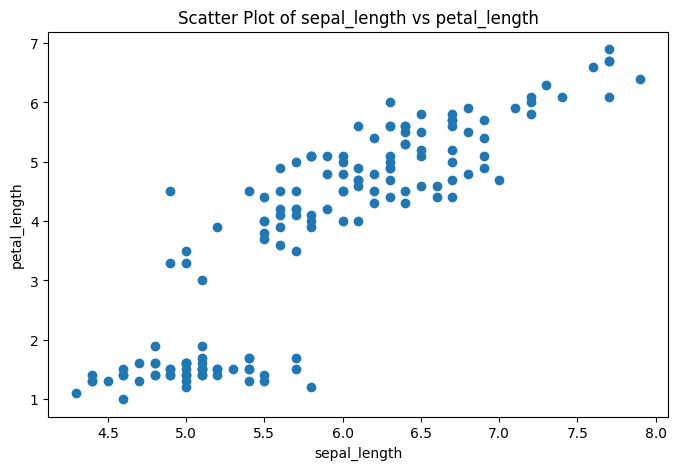

Covariance Matrix:
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006

 Correlation Matrix:
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


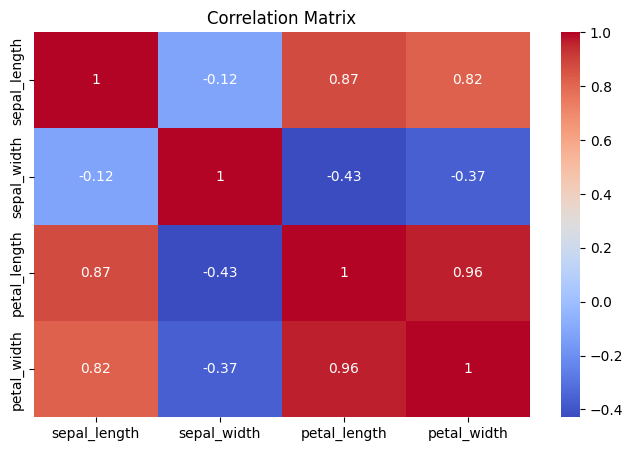

In [1]:
# Kindly use the jupyter Notebook to run the program.

# Load Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
data = sns.load_dataset('iris')


# Calculate Pearson correlation coefficient
correlation = data[['sepal_length','petal_length']].corr('pearson')
print("Pearson Correlation Coefficient:\n", correlation)


# Compute covariance matrix
covariance = data[['sepal_length','petal_length']].cov()
print("Covariance Matrix:\n", covariance)

x_col = 'sepal_length'
y_col = 'petal_length'

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(data[x_col], data[y_col])
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Scatter Plot of {x_col} vs {y_col}")
plt.show()

# Calculate covariance and correlation matrix for a dataset
data_co = data.iloc[:, :-1]
covariance_matrix = data_co.cov()
correlation_matrix = data_co.corr()
print("Covariance Matrix:\n", covariance_matrix)
print("\n Correlation Matrix:\n", correlation_matrix)


# Visualize correlation matrix using heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Kindly use the jupyter Notebook to run the program.

# Load Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data (mean=0, variance=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Species'] = y

# Visualize the reduced data
plt.figure(figsize=(6, 4))
species = ['Setosa', 'Versicolor', 'Virginica']
colors = ['brown', 'hotpink', 'purple']
for species, color in zip(np.unique(y), colors):
    plt.scatter(df_pca.loc[df_pca['Species'] == species, 'PC1'],
                df_pca.loc[df_pca['Species'] == species, 'PC2'],
                c=color, label=iris.target_names[species])

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate k-NN for different values of k
def cls_knn(X_train, X_test, y_train, y_test, k_values, weighted=False):
    results = {}
    for k in k_values:
        if weighted:
            knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
        else:
            knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')

        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1-score for multi-class
        results[k] = {'accuracy': accuracy, 'f1_score': f1}
    return results

k_values = [1, 3, 5]

# Evaluate regular k-NN
print("Regular k-NN Results:")
regular_knn = cls_knn(X_train, X_test, y_train, y_test, k_values, weighted=False)
for k, metrics in regular_knn.items():
    print(f"k={k}: Accuracy={metrics['accuracy']:.4f}, F1-Score={metrics['f1_score']:.4f}")

# Evaluate weighted k-NN
print("\nWeighted k-NN Results:")
weighted_knn = cls_knn(X_train, X_test, y_train, y_test, k_values, weighted=True)
for k, metrics in weighted_knn.items():
    print(f"k={k}: Accuracy={metrics['accuracy']:.4f}, F1-Score={metrics['f1_score']:.4f}")

print("\nComparison of Regular k-NN and Weighted k-NN:")
for k in k_values:
    regular_acc = regular_knn[k]['accuracy']
    weighted_acc = weighted_knn[k]['accuracy']
    print(f"k={k}: Regular k-NN Accuracy={regular_acc:.4f}, Weighted k-NN Accuracy={weighted_acc:.4f}")

Regular k-NN Results:
k=1: Accuracy=1.0000, F1-Score=1.0000
k=3: Accuracy=1.0000, F1-Score=1.0000
k=5: Accuracy=1.0000, F1-Score=1.0000

Weighted k-NN Results:
k=1: Accuracy=1.0000, F1-Score=1.0000
k=3: Accuracy=1.0000, F1-Score=1.0000
k=5: Accuracy=1.0000, F1-Score=1.0000

Comparison of Regular k-NN and Weighted k-NN:
k=1: Regular k-NN Accuracy=1.0000, Weighted k-NN Accuracy=1.0000
k=3: Regular k-NN Accuracy=1.0000, Weighted k-NN Accuracy=1.0000
k=5: Regular k-NN Accuracy=1.0000, Weighted k-NN Accuracy=1.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Add some non-linearity to the dataset
y = y + 10 * np.sin(X[:, 0] * 2)

# Plot the dataset
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Synthetic Dataset")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

# Locally Weighted Regression function
def locally_weighted_regression(X, y, query_point, tau=0.1):
    # Compute weights using a Gaussian kernel
    weights = np.exp(-np.sum((X - query_point) ** 2, axis=1) / (2 * tau ** 2))

    X_bias = np.c_[np.ones(X.shape[0]), X]

    W = np.diag(weights)
    theta = np.linalg.inv(X_bias.T @ W @ X_bias) @ (X_bias.T @ W @ y)

    # Predict the target value for the query point
    query_point_bias = np.array([1, query_point[0]])
    y_pred = query_point_bias @ theta

    return y_pred

# Predict using Locally Weighted Regression
def predict_lwr(X_train, y_train, X_test, tau=0.1):
    y_pred = np.zeros(X_test.shape[0])
    for i, query_point in enumerate(X_test):
        y_pred[i] = locally_weighted_regression(X_train, y_train, query_point, tau)
    return y_pred

# Generate test points
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predict using LWR
tau = 0.1  # Bandwidth parameter
y_pred = predict_lwr(X, y, X_test, tau)

# Plot the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', label='LWR Fit')
plt.title(f"Locally Weighted Regression (tau={tau})")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(y, predict_lwr(X, y, X, tau))
print(f"Mean Squared Error (MSE) on Training Data: {mse:.4f}")

In [3]:
# Kindly use the jupyter Notebook to run the program.

# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston Housing Dataset
boston_df = pd.read_csv("boston_housing_data.csv")
print("Linear Regression on Boston Housing Dataset")

X = boston_df[['RM']]  # Using 'RM' (average number of rooms) as the feature
y = boston_df['MEDV']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

# Make predictions
y_pred = LR_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('House Price (MEDV)')
plt.title('Linear Regression on Boston Housing Dataset')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'boston_housing_data.csv'

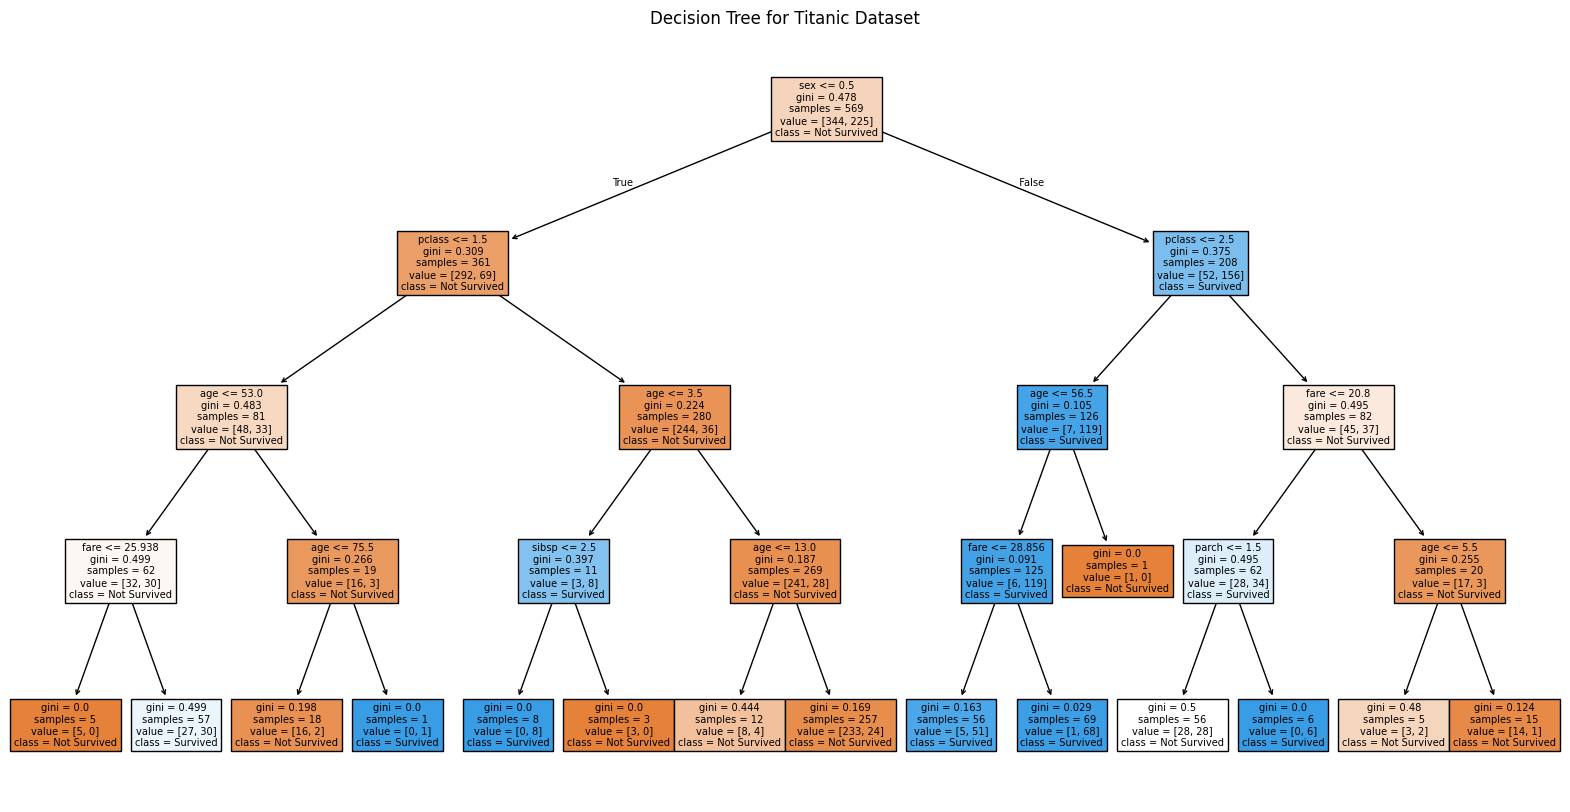

Accuracy: 0.71
Precision: 0.72
Recall: 0.54
F1 Score: 0.62


In [4]:
# Kindly use the jupyter Notebook to run the program.

# Load Libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


# Load the Titanic Dataset
data = sns.load_dataset('titanic')

# Preprocess the dataset
# Select relevant features and drop rows with missing values
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
data = data[features + ['survived']].dropna()

# Convert categorical columns to numerical
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['embarked'] = data['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Define features and target
X = data[features]
y = data['survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=['Not Survived','Survived'], filled=True)
plt.title("Decision Tree for Titanic Dataset")
plt.show()

y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")

Accuracy of the Naive Bayes classifier: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



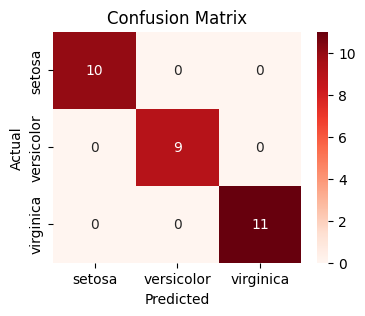

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
model = GaussianNB()

# Train the classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Naive Bayes classifier: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# The confusion matrix to visualize the performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Silhouette Score: 0.345
Adjusted Rand Index: 0.677


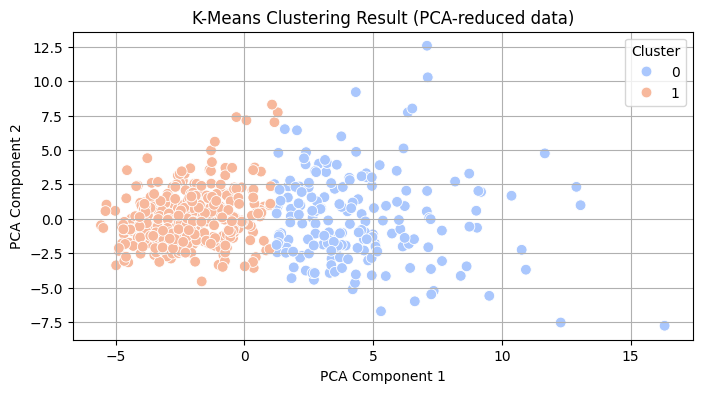

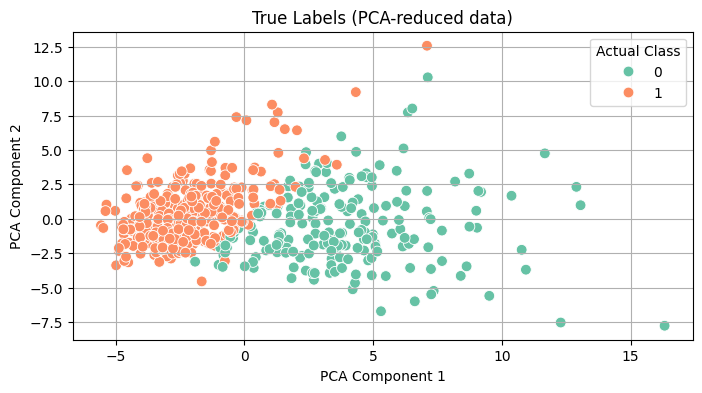

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y_true = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Evaluate the model
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
ari_score = adjusted_rand_score(y_true, y_kmeans)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Adjusted Rand Index: {ari_score:.3f}")

# Visualize the clustering result using PCA (for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans,
                palette="coolwarm", s=60)
plt.title('K-Means Clustering Result (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# compare with the true labels
plt.figure(figsize=(8,4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_true,
                palette="Set2", s=60)
plt.title('True Labels (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Actual Class")
plt.grid(True)
plt.show()

Silhouette Score: 0.345
Adjusted Rand Index: 0.677


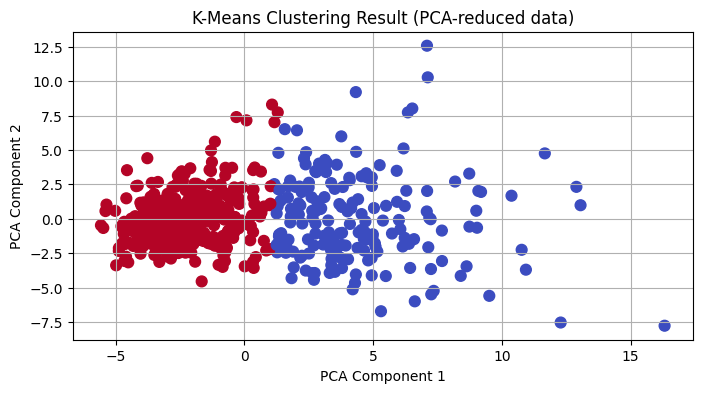

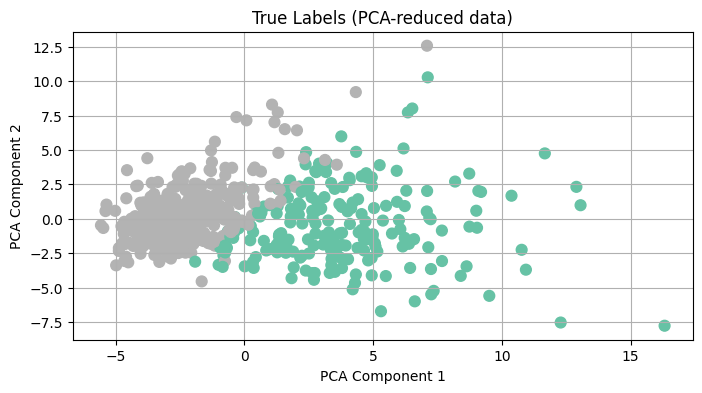

In [ ]:
# Import basic libraries
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y_true = data.target

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Evaluate performance
print(f"Silhouette Score: {silhouette_score(X_scaled, y_kmeans):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_true, y_kmeans):.3f}")

# Reduce dimensions for visualization
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

# Plot clustering result
plt.figure(figsize=(8, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='coolwarm', s=60)
plt.title('K-Means Clustering Result (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()

# Plot true labels
plt.figure(figsize=(8, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='Set2', s=60)
plt.title('True Labels (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()